# Stock Value Prediction Using M.L.

 IMPORTING THE LIBRARIES

In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pdr.get_data_tiingo('AAPL',api_key='76f7d66cca0db806763d74db96f66e05bd1d7872')

LOADING THE STOCK PRICES DATASET & READ THE DATASET

In [3]:
df.to_csv('AAPL.csv')
df=pd.read_csv("AAPL.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-16 00:00:00+00:00,190.91,192.65,190.42,191.52,15043110,45.608149,46.023833,45.491089,45.753878,60172440,0.0,1.0
1,AAPL,2018-07-17 00:00:00+00:00,191.45,191.87,189.20,189.75,15534523,45.737155,45.837492,45.199633,45.331027,62138092,0.0,1.0
2,AAPL,2018-07-18 00:00:00+00:00,190.40,191.80,189.93,191.78,16393381,45.486311,45.820769,45.374029,45.815991,65573524,0.0,1.0
3,AAPL,2018-07-19 00:00:00+00:00,191.88,192.55,189.69,189.69,20286752,45.839881,45.999943,45.316693,45.316693,81147008,0.0,1.0
4,AAPL,2018-07-20 00:00:00+00:00,191.44,192.43,190.17,191.78,20706042,45.734766,45.971275,45.431364,45.815991,82824168,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-07-07 00:00:00+00:00,190.68,192.67,190.240,191.41,46814998,190.68,192.67,190.240,191.41,46814998,0.0,1.0
1253,AAPL,2023-07-10 00:00:00+00:00,188.61,189.99,187.035,189.26,59922163,188.61,189.99,187.035,189.26,59922163,0.0,1.0
1254,AAPL,2023-07-11 00:00:00+00:00,188.08,189.30,186.600,189.16,46638119,188.08,189.30,186.600,189.16,46638119,0.0,1.0
1255,AAPL,2023-07-12 00:00:00+00:00,189.77,191.70,188.470,189.68,60750248,189.77,191.70,188.470,189.68,60750248,0.0,1.0
1256,AAPL,2023-07-13 00:00:00+00:00,190.54,191.19,189.780,190.50,41342338,190.54,191.19,189.780,190.50,41342338,0.0,1.0


In [5]:
df1=df.reset_index()['close']
df1.shape
df1

0       190.91
1       191.45
2       190.40
3       191.88
4       191.44
         ...  
1252    190.68
1253    188.61
1254    188.08
1255    189.77
1256    190.54
Name: close, Length: 1257, dtype: float64

#The plot() function is used to draw points (markers) in a diagram.By default, the plot() function draws a line from
point to point.

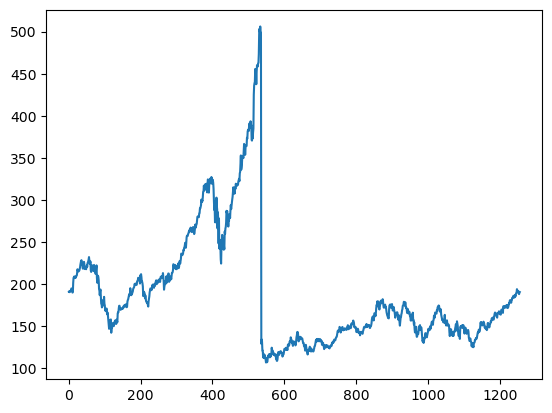

In [6]:
plt.plot(df1)

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1257, 1)

In [8]:
df1

array([[0.21056982],
       [0.21192235],
       [0.20929242],
       ...,
       [0.20348153],
       [0.20771446],
       [0.20964308]])

In [9]:
training_size=int(len(df1)*0.65)
testing_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
len(train_data),len(test_data)

(817, 440)

The function below takes the entire data and creates windows of size time_steps starting from the beginning . The target y will
contain the target value corresponding to the time_steps index.So if time_steps is 10, the first element in X will have features 
from 10 data samples, and y will contain the target of the 10th data sample.

In [11]:
import numpy
def create_dataset(dataset,time_step=1):
   dataX, dataY=[], []
   for i in range(len(dataset)-time_step-1):
     a=dataset[i:(i+time_step),0]
     dataX.append(a)
     dataY.append(dataset[i+time_step,0])
   return numpy.array(dataX),numpy.array(dataY)

In [12]:
time_step=100
X_train, Y_train= create_dataset(train_data, time_step)
X_test, Y_test= create_dataset(test_data, time_step)

In [13]:
print(X_train.shape) ,print(Y_train.shape)

(716, 100)
(716,)


(None, None)

In [14]:
print(X_test.shape), print(Y_test.shape)

(339, 100)
(339,)


(None, None)

In [15]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

CREATING LSTM MODEL

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 200ms/step - loss: 0.0416 - val_loss: 0.0028
Epoch 2/100
12/12 [==============================] - 2s 138ms/step - loss: 0.0147 - val_loss: 0.0020
Epoch 3/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0105 - val_loss: 4.7794e-04
Epoch 4/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0091 - val_loss: 0.0012
Epoch 5/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0111 - val_loss: 6.5847e-04
Epoch 6/100
12/12 [==============================] - 1s 114ms/step - loss: 0.0085 - val_loss: 0.0013
Epoch 7/100
12/12 [==============================] - 1s 115ms/step - loss: 0.0073 - val_loss: 3.3673e-04
Epoch 8/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0061 - val_loss: 2.9069e-04
Epoch 9/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0053 - val_loss: 3.6287e-04
Epoch 10/100
12/12 [==============================] - 1s 116ms/step - l

In [19]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 21ms/step


In [20]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
math.sqrt(mean_squared_error(Y_test,test_predict))

151.80250621845127

In [22]:
math.sqrt(mean_squared_error(Y_train,train_predict))

219.25058715103629

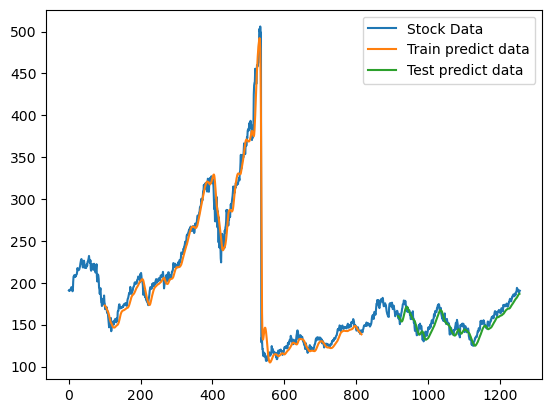

In [23]:
import numpy
lookback=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[lookback:len(train_predict)+lookback,:]=train_predict

#shfting test for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(lookback*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1),label='Stock Data')
plt.plot(trainPredictPlot,label='Train predict data')
plt.plot(testPredictPlot,label='Test predict data')
plt.legend()
plt.show()

#prediction for future 30 days

In [24]:
len(test_data)

440

In [28]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067

In [30]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.20035839]
101
1 day input [0.10429555 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553
 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117
 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517
 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583
 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134
 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638
 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218
 0.20077646 0.19997495 0.19644333

In [31]:
day_new=np.arange(1,102)
day_pred=np.arange(102,132)

In [32]:
len(df1)

1257

IMPLEMENTATION AND RESULTS

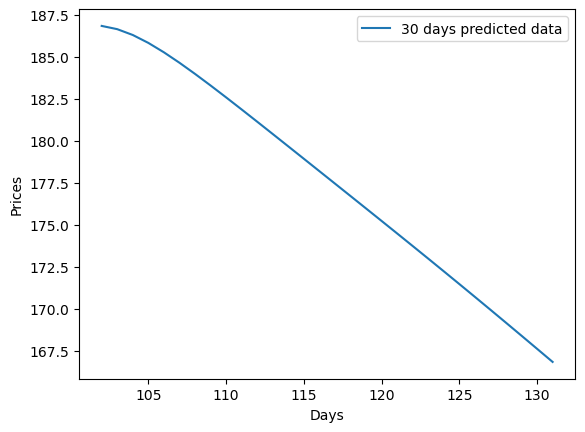

In [33]:
#plt.plot(day_new,scaler.inverse_transform(df1[1156:]),label='Real data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='30 days predicted data')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()

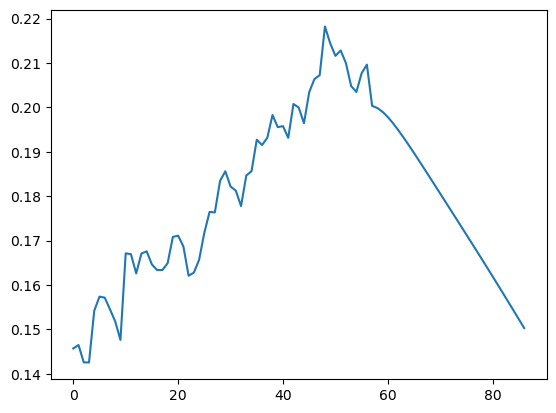

In [34]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])